In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Reload the forecast data
forecast_data = pd.read_csv('EaglesPointData.csv', parse_dates=['Date'], encoding='latin1')
forecast_data = forecast_data.sort_values('Date').set_index('Date')

# Splitting the data into training and test sets (80% training, 20% test)
train_size = int(0.8 * len(forecast_data))
train = forecast_data.iloc[:train_size]
test = forecast_data.iloc[train_size:]

# Impute missing values with the mean of respective columns
train_filled = train.fillna(train.mean())
test_filled = test.fillna(train.mean())  # Use mean from training data for imputation in the test set

/var/folders/wx/jd5wkv_d6f3_lzzhks8pj4hh0000gn/T/ipykernel_9611/1805823747.py:15: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train_filled = train.fillna(train.mean())
/var/folders/wx/jd5wkv_d6f3_lzzhks8pj4hh0000gn/T/ipykernel_9611/1805823747.py:16: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  test_filled = test.fillna(train.mean())  # Use mean from training data for imputation in the test set


In [5]:
# Calculate the correlation with the target variable 'Prim Eff CBOD5 mg/L'
correlation_cbod5 = forecast_data.corr()['Prim Eff CBOD5 mg/L'].sort_values(ascending=False)

# Extract the top 10 most correlated influent parameters for 'Prim Eff CBOD5 mg/L'
top_10_features_cbod5 = correlation_cbod5.index[1:11].tolist()
top_10_features_cbod5

['Prim Eff NH4 mgN/L',
 'Prim Eff TP mgP/L',
 'Inf CBOD5 mg/L',
 'Prim Eff TKN mgN/L',
 'Plant Eff CBOD5 mg/L',
 'SEC Aer Basin 4 Oxic Z-1 DO',
 'SEC Aer Basin 3 Oxic Z-3 Air Flow.1',
 'SEC Aer Basin 3 Oxic Z-3 Air Flow',
 'SEC Aer Basin 2 Oxic Z-2 Air Flow',
 'SEC Aer Basin 2 Oxic Z-2 Air Flow.1']

/Users/praewa36/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/praewa36/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/praewa36/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/praewa36/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


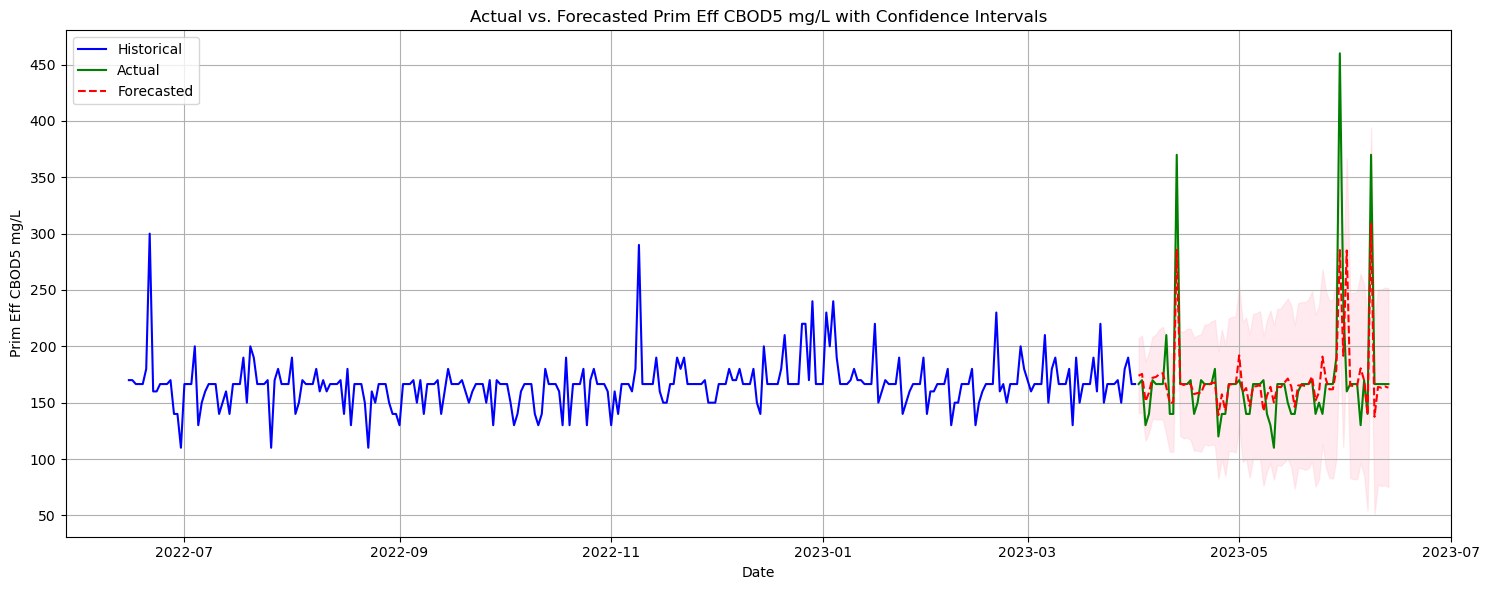

In [6]:
# Define ARIMA model building for 'Prim Eff CBOD5 mg/L' using the filled data
model_cbod5 = ARIMA(train_filled['Prim Eff CBOD5 mg/L'], order=(5,1,0), exog=train_filled[top_10_features_cbod5])

# Fit the model
model_cbod5_fit = model_cbod5.fit()

# Forecast CBOD5 with confidence intervals
forecast_results_cbod5 = model_cbod5_fit.get_forecast(steps=len(test_filled), exog=test_filled[top_10_features_cbod5])
forecasted_values_cbod5 = forecast_results_cbod5.predicted_mean
conf_int_cbod5 = forecast_results_cbod5.conf_int()

# Plotting
plt.figure(figsize=(15, 6))
plt.plot(train_filled.index, train_filled['Prim Eff CBOD5 mg/L'], label='Historical', color='blue')
plt.plot(test_filled.index, test_filled['Prim Eff CBOD5 mg/L'], label='Actual', color='green')
plt.plot(test_filled.index, forecasted_values_cbod5, label='Forecasted', color='red', linestyle='--')
plt.fill_between(test_filled.index, conf_int_cbod5.iloc[:, 0], conf_int_cbod5.iloc[:, 1], color='pink', alpha=0.3)

plt.title('Actual vs. Forecasted Prim Eff CBOD5 mg/L with Confidence Intervals')
plt.xlabel('Date')
plt.ylabel('Prim Eff CBOD5 mg/L')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [2]:
# Calculate the correlation with the target variable 'Prim Eff TKN mgN/L'
correlation_tkn = forecast_data.corr()['Prim Eff TKN mgN/L'].sort_values(ascending=False)

# Extract the top 10 most correlated influent parameters for 'Prim Eff TKN mgN/L'
top_10_features_tkn = correlation_tkn.index[1:11].tolist()
top_10_features_tkn

['Prim Eff NH4 mgN/L',
 'Prim Eff TP mgP/L',
 'Prim Eff CBOD5 mg/L',
 'Plant Eff TKN mgN/L',
 'Inf TKN mgN/L',
 'SEC Aer Basin 4 Oxic Z-1 Air Flow.1',
 'SEC Aer Basin 4 Oxic Z-1 Air Flow',
 'Inf TP mgP/L',
 'SEC Aer Basin 4 Oxic Z-2 DO',
 'SEC Aer Basin 2 Oxic Z-1 DO']

/Users/praewa36/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/praewa36/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/praewa36/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/praewa36/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


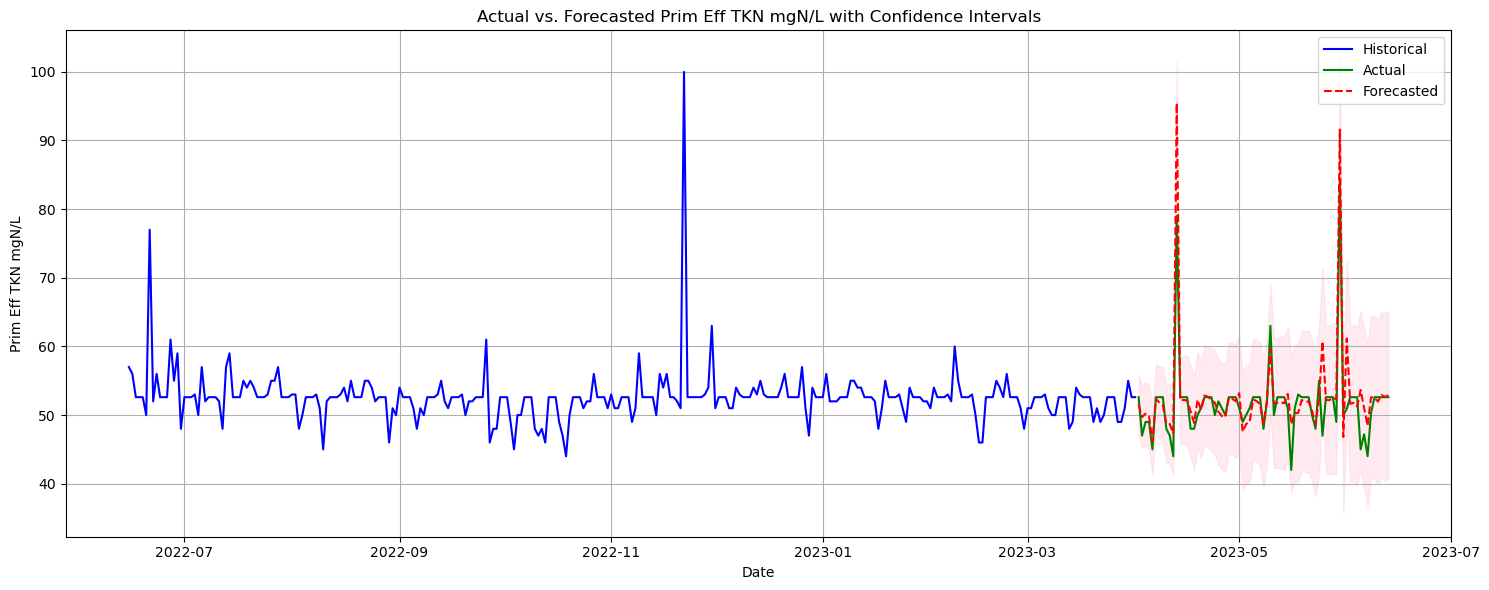

In [3]:
# Define the ARIMA model for TKN using top correlated features
model_tkn = ARIMA(train_filled['Prim Eff TKN mgN/L'], order=(5,1,0), exog=train_filled[top_10_features_tkn])

# Fit the model
model_tkn_fit = model_tkn.fit()

# Forecast TKN with confidence intervals
forecast_results_tkn = model_tkn_fit.get_forecast(steps=len(test_filled), exog=test_filled[top_10_features_tkn])
forecasted_values_tkn = forecast_results_tkn.predicted_mean
conf_int_tkn = forecast_results_tkn.conf_int()

# Plotting the actual vs forecasted values for 'Prim Eff TKN mgN/L' with confidence intervals
plt.figure(figsize=(15, 6))
plt.plot(train_filled.index, train_filled['Prim Eff TKN mgN/L'], label='Historical', color='blue')
plt.plot(test_filled.index, test_filled['Prim Eff TKN mgN/L'], label='Actual', color='green')
plt.plot(test_filled.index, forecasted_values_tkn, label='Forecasted', color='red', linestyle='--')
plt.fill_between(test_filled.index, conf_int_tkn.iloc[:, 0], conf_int_tkn.iloc[:, 1], color='pink', alpha=0.3)

plt.title('Actual vs. Forecasted Prim Eff TKN mgN/L with Confidence Intervals')
plt.xlabel('Date')
plt.ylabel('Prim Eff TKN mgN/L')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [7]:
# Calculate the correlation with the target variable 'Prim Eff TP mgP/L'
correlation_tp = forecast_data.corr()['Prim Eff TP mgP/L'].sort_values(ascending=False)

# Extract the top 10 most correlated influent parameters for 'Prim Eff TP mgP/L'
top_10_features_tp = correlation_tp.index[1:11].tolist()
top_10_features_tp

['Prim Eff NH4 mgN/L',
 'Prim Eff TKN mgN/L',
 'Prim Eff CBOD5 mg/L',
 'SEC Aer Basin 4 Oxic Z-1 Air Flow',
 'SEC Aer Basin 4 Oxic Z-1 Air Flow.1',
 'Plant Eff TKN mgN/L',
 'Plant Eff TP mgP/L',
 'SEC Aer Basin 2 Oxic Z-3 Air Flow',
 'SEC Aer Basin 2 Oxic Z-3 Air Flow.1',
 'SEC Aer Basin 1 Oxic Z-2 Air Flow']

/Users/praewa36/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/praewa36/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/praewa36/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/praewa36/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


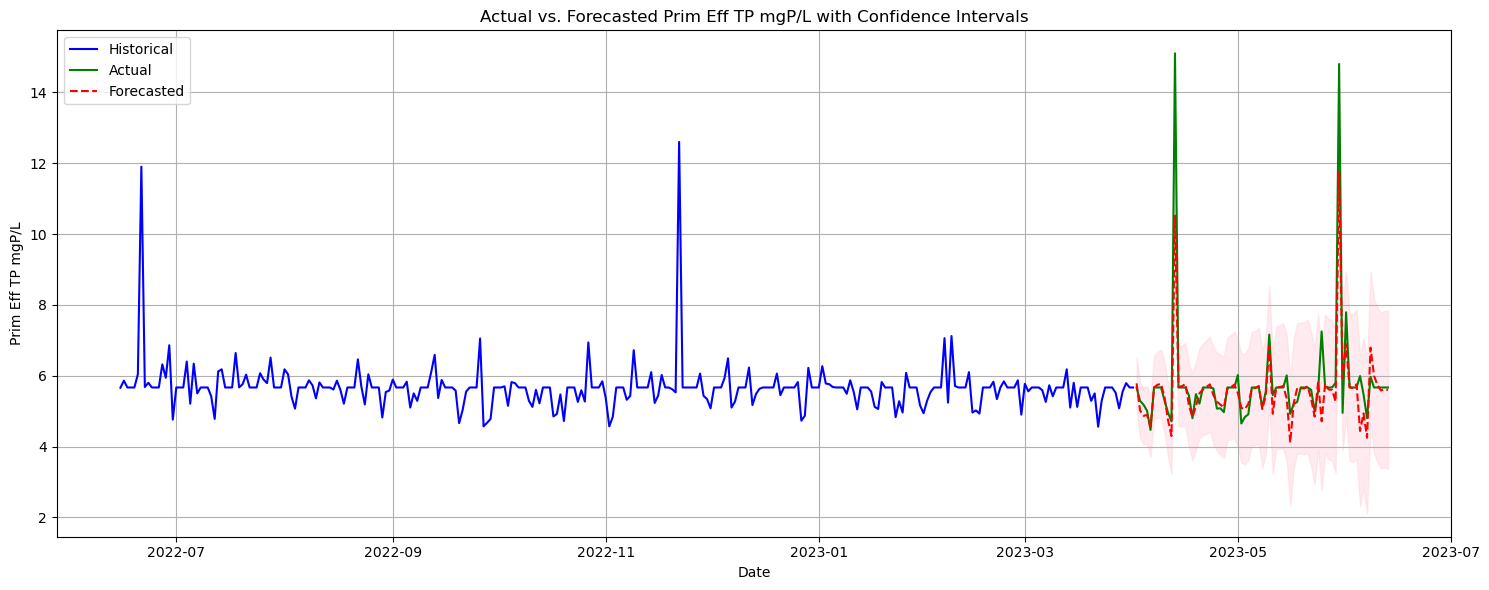

In [8]:
# Define the ARIMA model for TP using top correlated features
model_tp = ARIMA(train_filled['Prim Eff TP mgP/L'], order=(5,1,0), exog=train_filled[top_10_features_tp])

# Fit the model
model_tp_fit = model_tp.fit()

# Forecast TP with confidence intervals
forecast_results_tp = model_tp_fit.get_forecast(steps=len(test_filled), exog=test_filled[top_10_features_tp])
forecasted_values_tp = forecast_results_tp.predicted_mean
conf_int_tp = forecast_results_tp.conf_int()

# Plotting the actual vs forecasted values for 'Prim Eff TP mgP/L' with confidence intervals
plt.figure(figsize=(15, 6))
plt.plot(train_filled.index, train_filled['Prim Eff TP mgP/L'], label='Historical', color='blue')
plt.plot(test_filled.index, test_filled['Prim Eff TP mgP/L'], label='Actual', color='green')
plt.plot(test_filled.index, forecasted_values_tp, label='Forecasted', color='red', linestyle='--')
plt.fill_between(test_filled.index, conf_int_tp.iloc[:, 0], conf_int_tp.iloc[:, 1], color='pink', alpha=0.3)

plt.title('Actual vs. Forecasted Prim Eff TP mgP/L with Confidence Intervals')
plt.xlabel('Date')
plt.ylabel('Prim Eff TP mgP/L')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Summary

#### - performed feature engineering to identify the top 10 most correlated influent parameters for each of the target variables.
#### - built ARIMA models using these features for 'Prim Eff CBOD5 mg/L', 'Prim Eff TKN mgN/L', and 'Prim Eff TP mgP/L'.
#### - visualized the actual vs. forecasted values for each target variable along with confidence intervals.

# 